In [3]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from skimage import io
from skimage.color import rgb2lab, lab2rgb
from sklearn.metrics import pairwise_distances_argmin

### Paso 2: Cargar imagen

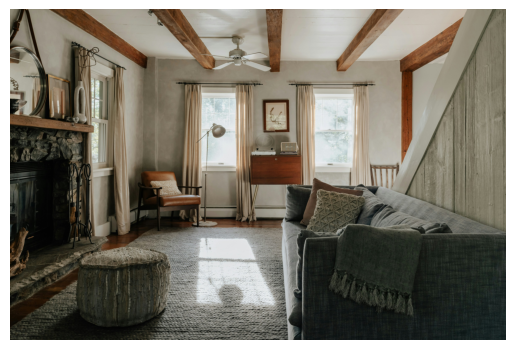

In [5]:
# Cargar la imagen
image = io.imread('..\image\clay-banks-PAoispQVHNI-unsplash.jpg')  # Usa una URL o el nombre del archivo local
plt.imshow(image)
plt.axis('off')
plt.show()

# Asegurarnos de que la imagen esté en el formato correcto
image = np.array(image, dtype=np.float64) / 255  # Normalizar los valores
rows, cols, dim = image.shape

### Paso 3: Realizar el clustering (KMeans)
Convertimos la imagen en una lista de píxeles y aplicamos KMeans para agrupar los colores.

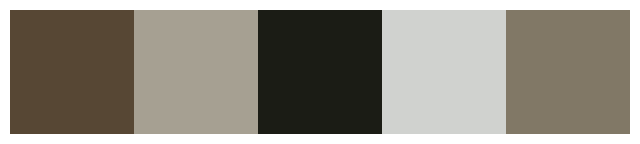

In [6]:
# Convertir la imagen 2D a una lista de píxeles
image_array = image.reshape((-1, 3))

# Número de clusters para la reducción de colores
num_clusters = 5  # Ajustar segun necesidad

# Aplicar KMeans
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(image_array)
labels = kmeans.predict(image_array)

# Obtener la paleta de colores
palette = kmeans.cluster_centers_

# Mostrar la paleta de colores
def plot_palette(palette):
    plt.figure(figsize=(8, 2))
    plt.imshow([palette])
    plt.axis('off')
    plt.show()

plot_palette(palette)


### Paso 4: Reconstruir la imagen con la paleta de colores reducida

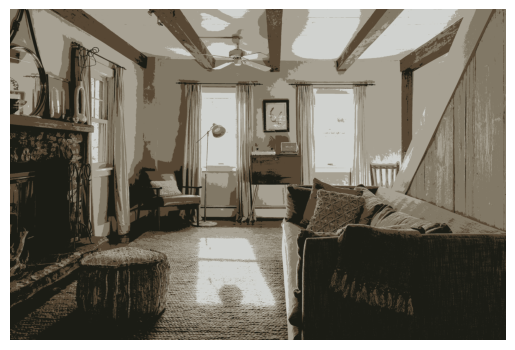

In [7]:
# Asignar cada píxel al color más cercano de la paleta
new_image_array = palette[labels]

# Reconstruir la imagen
new_image = new_image_array.reshape((rows, cols, dim))

# Mostrar la imagen reconstruida
plt.imshow(new_image)
plt.axis('off')
plt.show()


### Paso 5: Realizar clustering jerárquico
El clustering jerárquico se puede usar para encontrar patrones en los datos de píxeles. Aquí aplicamos el algoritmo de aglomeración jerárquica.

In [8]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=1000)
kmeans_labels = kmeans.fit_predict(image_array)

new_image_kmeans = palette[kmeans_labels].reshape((rows, cols, dim))

plt.imshow(new_image_kmeans)
plt.axis('off')
plt.show()



MemoryError: Unable to allocate 169. TiB for an array with shape (23294404267200,) and data type float64

### Paso 6: Usar Gaussian Mixture para la mezcla de gaussianas
Finalmente, aplicamos Gaussian Mixture Models para crear mezclas de gaussianas sobre los colores.

In [ ]:
# Modelo de mezclas gaussianas
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(image_array)
gmm_labels = gmm.predict(image_array)

# Reconstruir la imagen usando GMM
new_image_gmm = palette[gmm_labels].reshape((rows, cols, dim))

# Mostrar la imagen reconstruida
plt.imshow(new_image_gmm)
plt.axis('off')
plt.show()


### Paso 7: Conclusiones
Hemos reducido la escala de colores de la imagen utilizando KMeans, clustering jerárquico, y mezclas gaussianas.
Se Observa cómo cada método produce una representación ligeramente distinta de la imagen original.

Comentarios adicionales

* Ajustar el número de clusters según el scree plot o a las necesidades requeridas.

* Este código utiliza librerías estándar como sklearn y skimage para realizar las tareas.